In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 
from PIL import ImageFilter 
import timeit 
%matplotlib inline 

### chargement d'image 

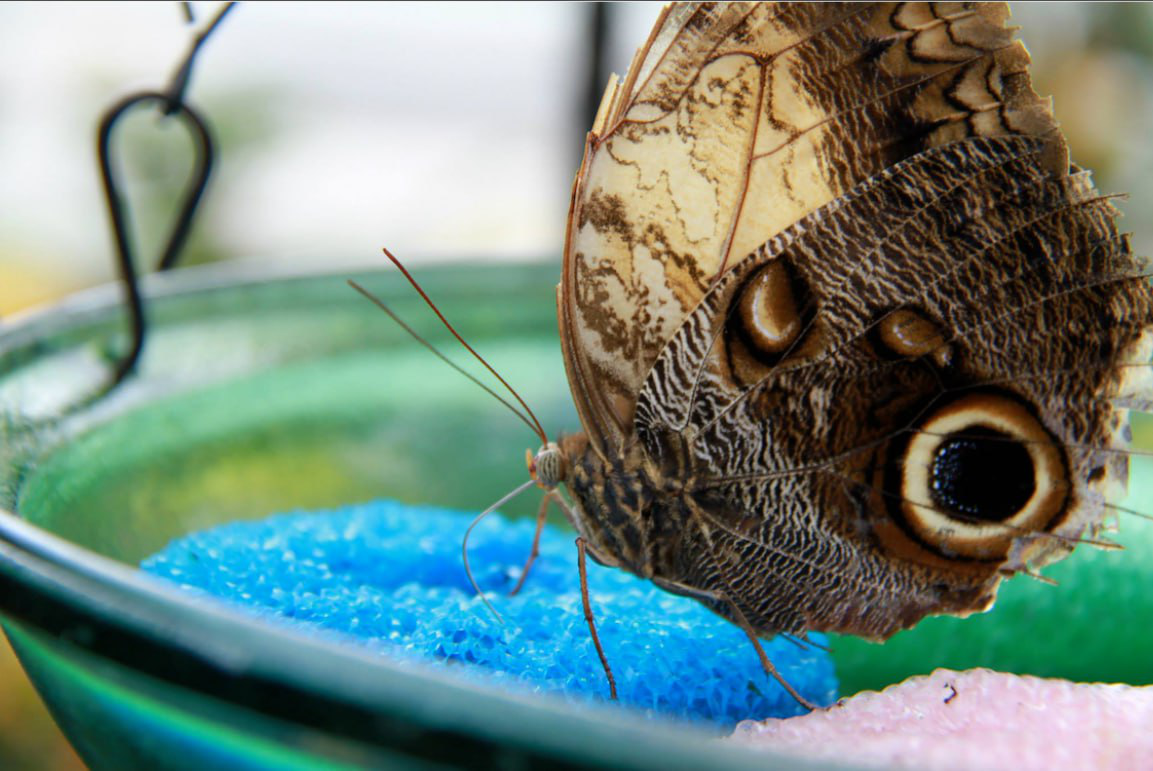

In [22]:
im = Image.open("./pic.jpg")
im = im.convert('RGB')
im

### conversion d'image au niveau de gris 

In [23]:
def rgb2gray (image): 
    pic = image.split()
    #layer_r = np.array(image)[:, :, 0]
    #layer_g = np.array(image)[:, :, 1]
    #layer_b = np.array(image)[:, :, 2]
    pic = np.array(pic)
    L = np.uint8(0.299 *pic[0] + 0.587*pic[1] + 0.114*pic[2])
    L = Image.fromarray(L)
    # mthod 2: 
    """"
    out = Image.new("L", im.size)
    M , N = im.size 
    for m in range (M): 
    for n in range (N):
    p = im.getpixel ((m,n))
    """
    return L 

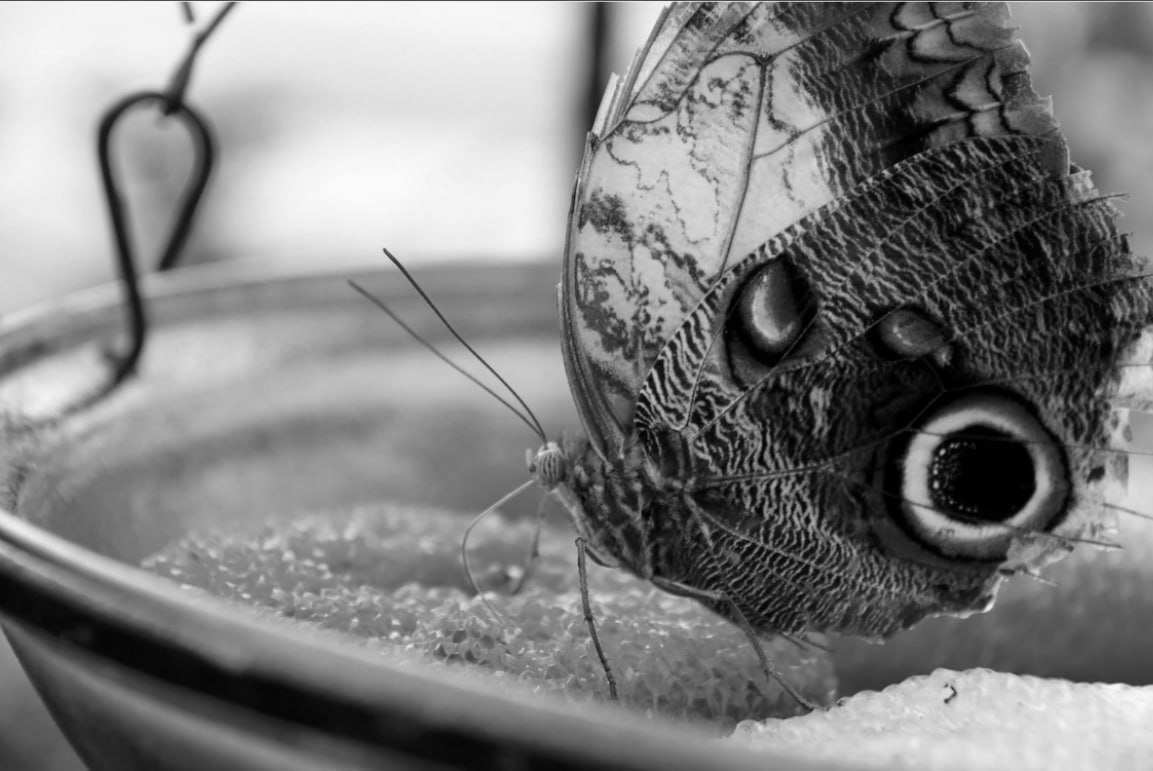

In [24]:
rgb2gray(im)



In [25]:
def rgb2gray2(im):
    out=Image.new("L",im.size)
    M,N=im.size
    for m in range(M):
        for n in range(N):
            p=im.getpixel((m,n))
            gray=int(p[0]*0.299+p[1]*0.587+p[2]*0.144)
            out.putpixel((m,n),gray)
            
    return out

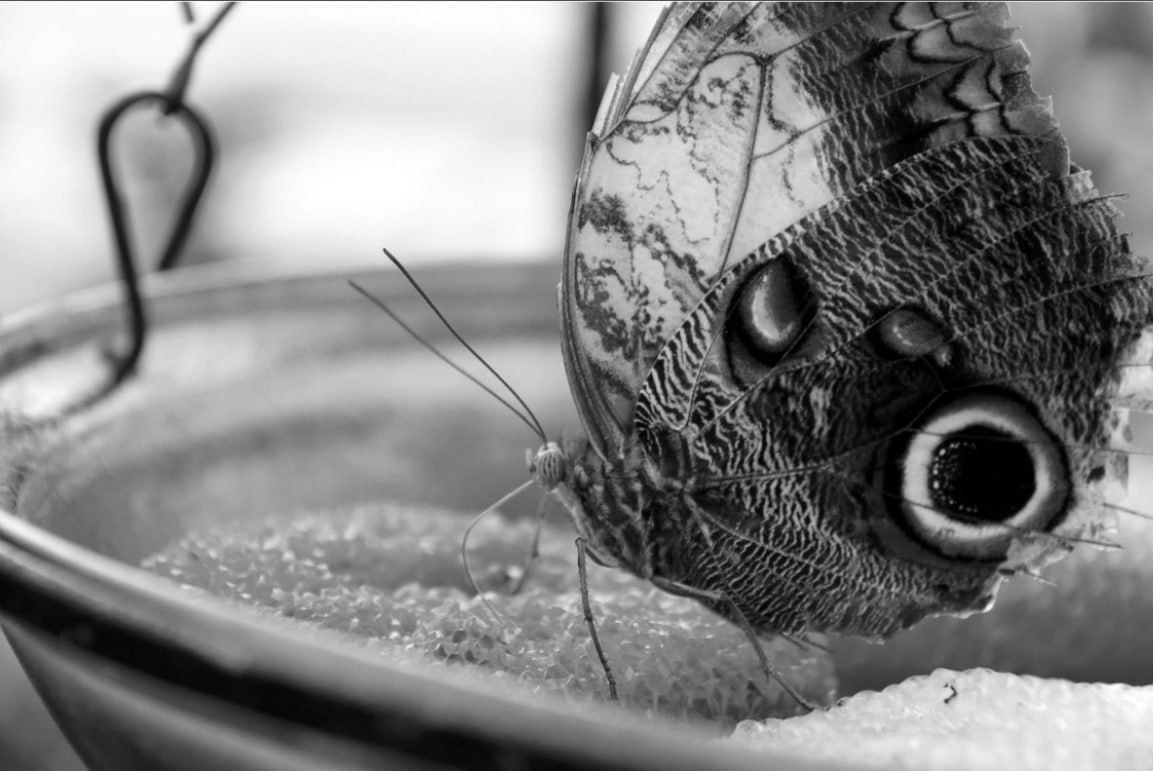

In [26]:
rgb2gray2(im)

In [27]:
def work (): 
    rgb2gray(im)
timeit.timeit ('work()', globals=globals(), number =1)

0.04927820002194494

In [28]:
def work (): 
    rgb2gray2(im)
timeit.timeit ('work()', globals=globals(), number =1)

4.675188800028991

les types de bruits 
* les bruit impe: soit a 0 ou bien 255 il est caracteriser par sa densite 
* le bruit gauss : sigma.randn(0,1)

In [29]:
def imnoise ( image ,  noise_type , noise_param , show=False ): 
    n, m = image.size
    k = int(n*m*noise_param)
    a=np.random.randint(0, n-1, k)
    b=np.random.randint(0, m-1, k)
    z= zip(a , b)
    if noise_type == "s": 
        for c in z: 
            noisy_image =image.putpixel ( c, 255)
    elif noise_type == "p":
        for c in z: 
            noisy_image =image.putpixel ( c, 0)
    elif noise_type == "s&p": 
        for c in z : 
            noisy_type = image.putpixel ( c, np.random.choice(0 , 255))
    if show := True: 
        display (noisy_image)
    return noisy_image 
        
        
  

In [30]:
imgd = rgb2gray(im.copy())
n, m =imgd.size
print (n,m)

1153 771


In [31]:
imgd =imnoise ( imgd ,  's&p' , 0.5 , show= True )


ValueError: a must be greater than 0 unless no samples are taken

In [105]:
imgd = rgb2gray(im.copy())
n, m =imgd.size
print (n,m)

1153 771


In [106]:
imgd =imnoise ( imgd ,  's' , 0.5 , show= True )


None

In [107]:
n, m = im.size
k = int(n*m*0.5)

a=np.random.randint(0, n-1, k)
b=np.random.randint(0, m-1, k)
z= zip(a , b)


In [85]:
print (a)

[ 629 1114  355 ...  144  119  790]


In [86]:
print (b)

[162 198 112 ... 505 266 625]


In [87]:
print (z)

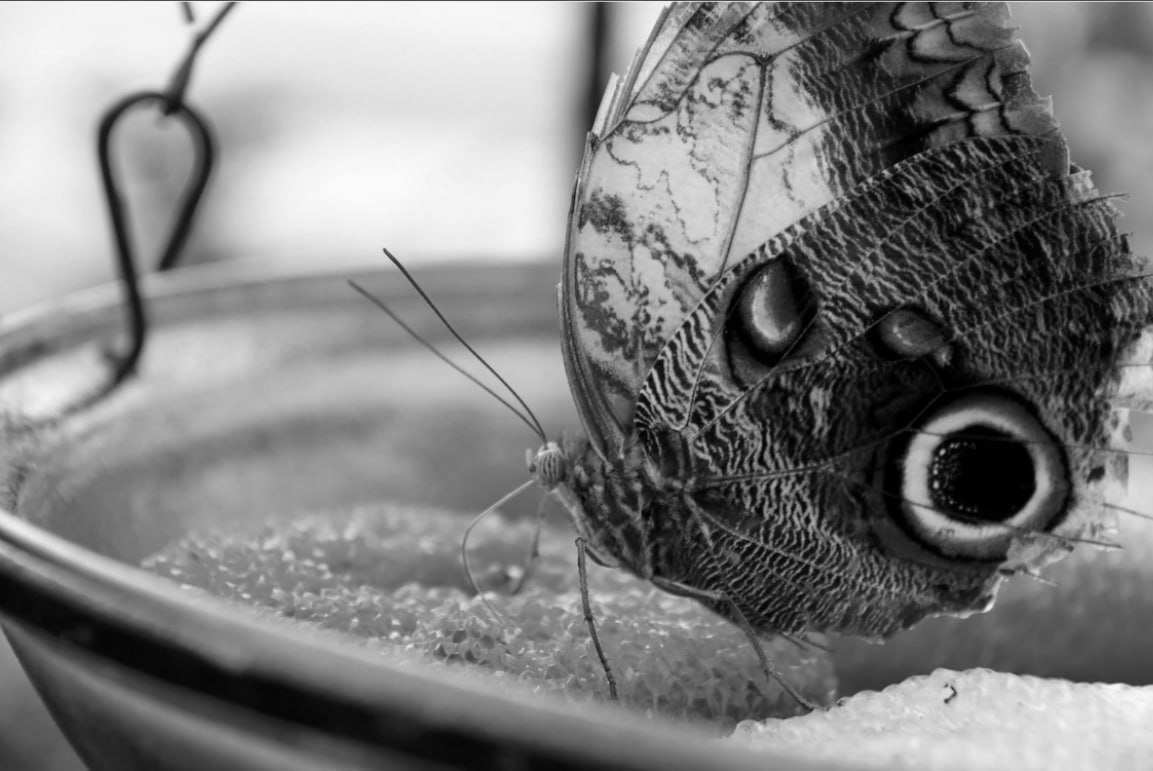

In [88]:
imgd = rgb2gray(im.copy())
imgd


In [89]:
for c in z: 
    imgd.putpixel ( c, 255)

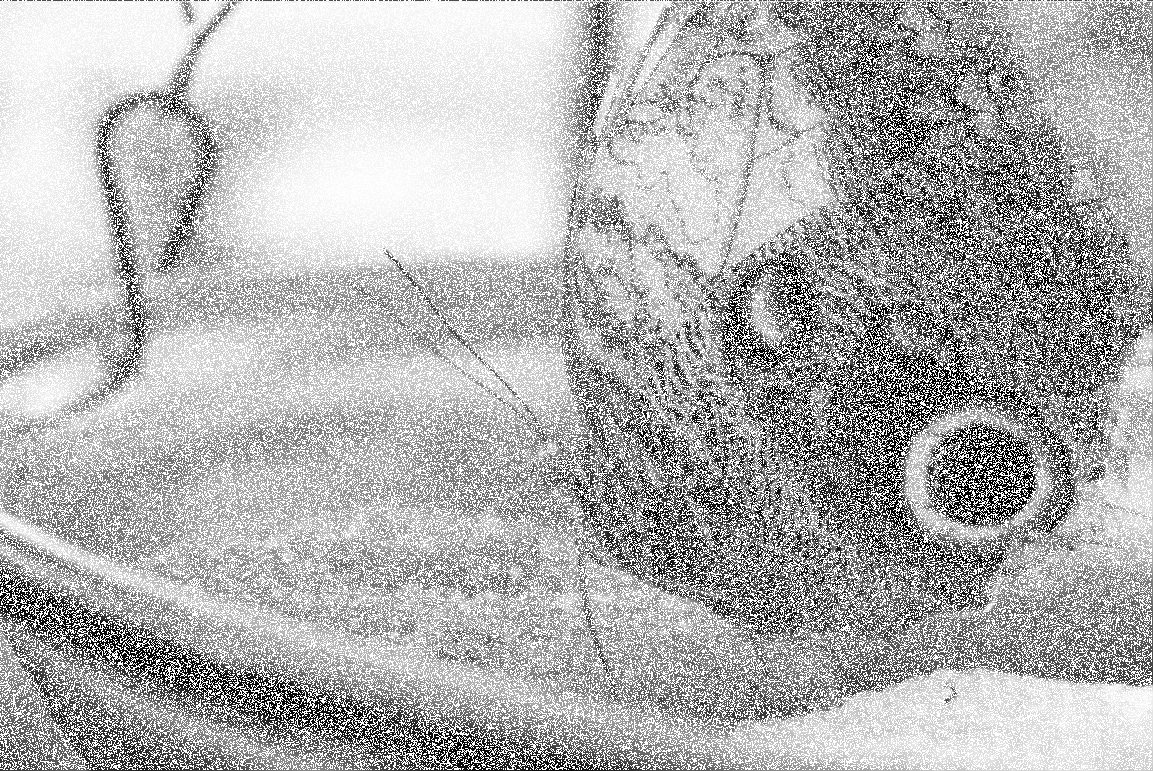

In [90]:
imgd